<h1 style="color:indigo;"><b><i>Startups Profitibility Analysis</i></b></h1>

<h2 style="color:slateblue;"><b>Goal to Analyze the data:</b></h2>

- Dataset is about Profitibility measure of startups.
- To analyze data using Rich Visualization.
- To make Prediction using Linear Regression Algorithm.

### Loading Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

### Task 1: 
- Load data
- Check basic infomation about the dataset.

In [2]:
df=pd.read_csv("50_Startups.csv")

In [3]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [4]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [6]:
# checking NaN values
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
# rows and columns
df.shape

(50, 5)

In [8]:
# checking unique values from each columns in a DataFrame
for i in df:
    print(i,"\n",df[i].unique())
    print()

R&D Spend 
 [165349.2  162597.7  153441.51 144372.41 142107.34 131876.9  134615.46
 130298.13 120542.52 123334.88 101913.08 100671.96  93863.75  91992.39
 119943.24 114523.61  78013.11  94657.16  91749.16  86419.7   76253.86
  78389.47  73994.56  67532.53  77044.01  64664.71  75328.87  72107.6
  66051.52  65605.48  61994.48  61136.38  63408.86  55493.95  46426.07
  46014.02  28663.76  44069.95  20229.59  38558.51  28754.33  27892.92
  23640.93  15505.73  22177.74   1000.23   1315.46      0.      542.05]

Administration 
 [136897.8  151377.59 101145.55 118671.85  91391.77  99814.71 147198.87
 145530.06 148718.95 108679.17 110594.11  91790.61 127320.38 135495.07
 156547.42 122616.84 121597.55 145077.58 114175.79 153514.11 113867.3
 153773.43 122782.75 105751.03  99281.34 139553.16 144135.98 127864.55
 182645.56 153032.06 115641.28 152701.92 129219.61 103057.49 157693.92
  85047.44 127056.21  51283.14  65947.93  82982.09 118546.05  84710.77
  96189.63 127382.3  154806.14 124153.04 115816.

#### Conclusion from task (1)
- Dataset Have 50: Rows, 5 Columns ['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']
- State column have object datatype & rest of the 4 columns have float datatype.
- From the above analysis there are no NAN values present.

### Task 2: 
- Detailed analysis using charts.
- distribution and describe
- State wise avg, max, min, sum.

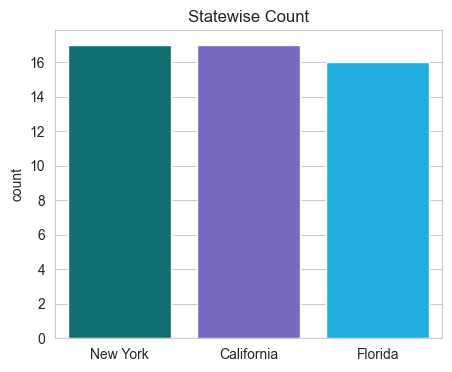

In [9]:
sns.set_style('whitegrid')
plt.figure(figsize=(5,4))
c=["teal","slateblue","deepskyblue"]
sns.countplot(x=df["State"],palette=c)
plt.title("Statewise Count")
plt.xlabel("")
plt.show()

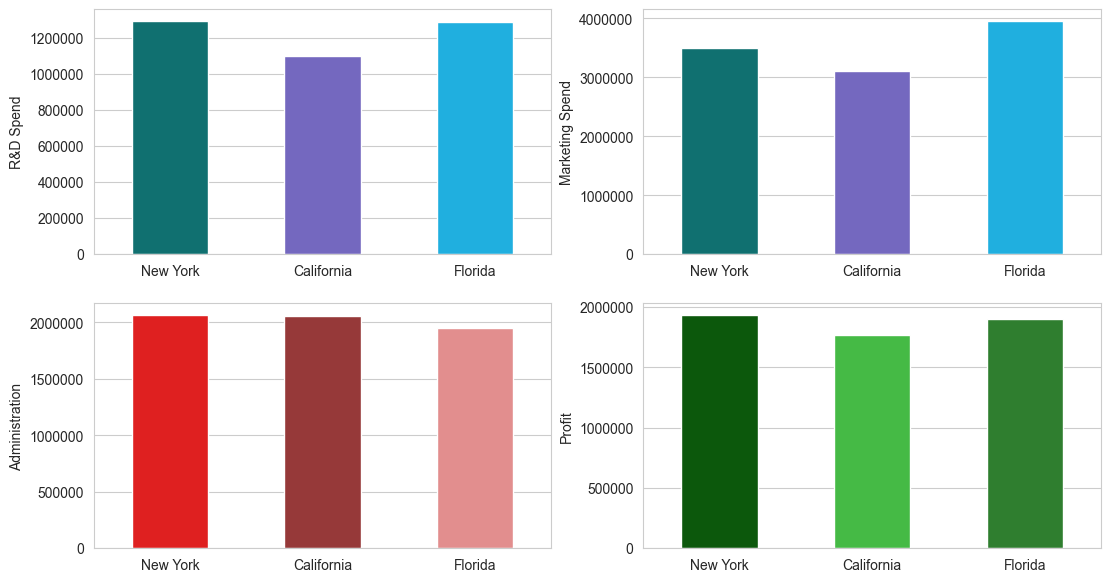

In [10]:
# State wise R&D, Administration Spend, Marketing & Profit
fig,axes=plt.subplots(2,2,figsize=(13,7))

sns.barplot(data=df,x="State",y="R&D Spend",palette=c,width=0.5,estimator=sum,ci=None,ax=axes[0,0])
axes[0,0].ticklabel_format(style='plain', axis='y')
axes[0,0].set_xlabel("")

#s_df=df.sort_values(by="Marketing Spend",ascending = True)
sns.barplot(data=df,x="State",y="Marketing Spend",palette=c,width=0.5,estimator=sum,ci=None,ax=axes[0,1])
axes[0,1].ticklabel_format(style='plain', axis='y')
axes[0,1].set_xlabel("")

c2=["red","brown","lightcoral"]
sns.barplot(data=df,x="State",y="Administration",palette=c2,width=0.5,estimator=sum,ci=None,ax=axes[1,0])
axes[1,0].ticklabel_format(style='plain', axis='y')
axes[1,0].set_xlabel("")

c1=["darkgreen","limegreen","forestgreen"]
sns.barplot(data=df,x="State",y="Profit",palette=c1,width=0.5,estimator=sum,ci=None,ax=axes[1,1])
axes[1,1].ticklabel_format(style='plain', axis='y')
axes[1,1].set_xlabel("")

plt.show()

#### Statewise: Total, Minimum, Maximum & Average

In [11]:
cols=['R&D Spend', 'Administration', 'Marketing Spend', 'Profit']
for i in range(1): #sum
    print(df.groupby("State")[cols].sum())

             R&D Spend  Administration  Marketing Spend      Profit
State                                                              
California  1099180.46      2052690.62       3103195.80  1766387.98
Florida     1291584.26      1948302.36       3957176.82  1900384.39
New York    1295316.06      2066239.00       3490882.27  1933859.59


In [12]:
for i in range(1): #mean
    print(df.groupby("State")[cols].mean())

               R&D Spend  Administration  Marketing Spend         Profit
State                                                                   
California  64657.674118   120746.507059    182540.929412  103905.175294
Florida     80724.016250   121768.897500    247323.551250  118774.024375
New York    76195.062353   121543.470588    205346.015882  113756.446471


In [13]:
for i in range(1): #max
    print(df.groupby("State")[cols].max())

            R&D Spend  Administration  Marketing Spend     Profit
State                                                            
California  162597.70       157693.92        443898.53  191792.06
Florida     153441.51       182645.56        407934.54  191050.39
New York    165349.20       153773.43        471784.10  192261.83


In [14]:
for i in range(1): #min
    print(df.groupby("State")[cols].min())

            R&D Spend  Administration  Marketing Spend    Profit
State                                                           
California       0.00        51283.14             0.00  14681.40
Florida       1315.46        84710.77         91131.24  49490.75
New York       542.05        51743.15             0.00  35673.41


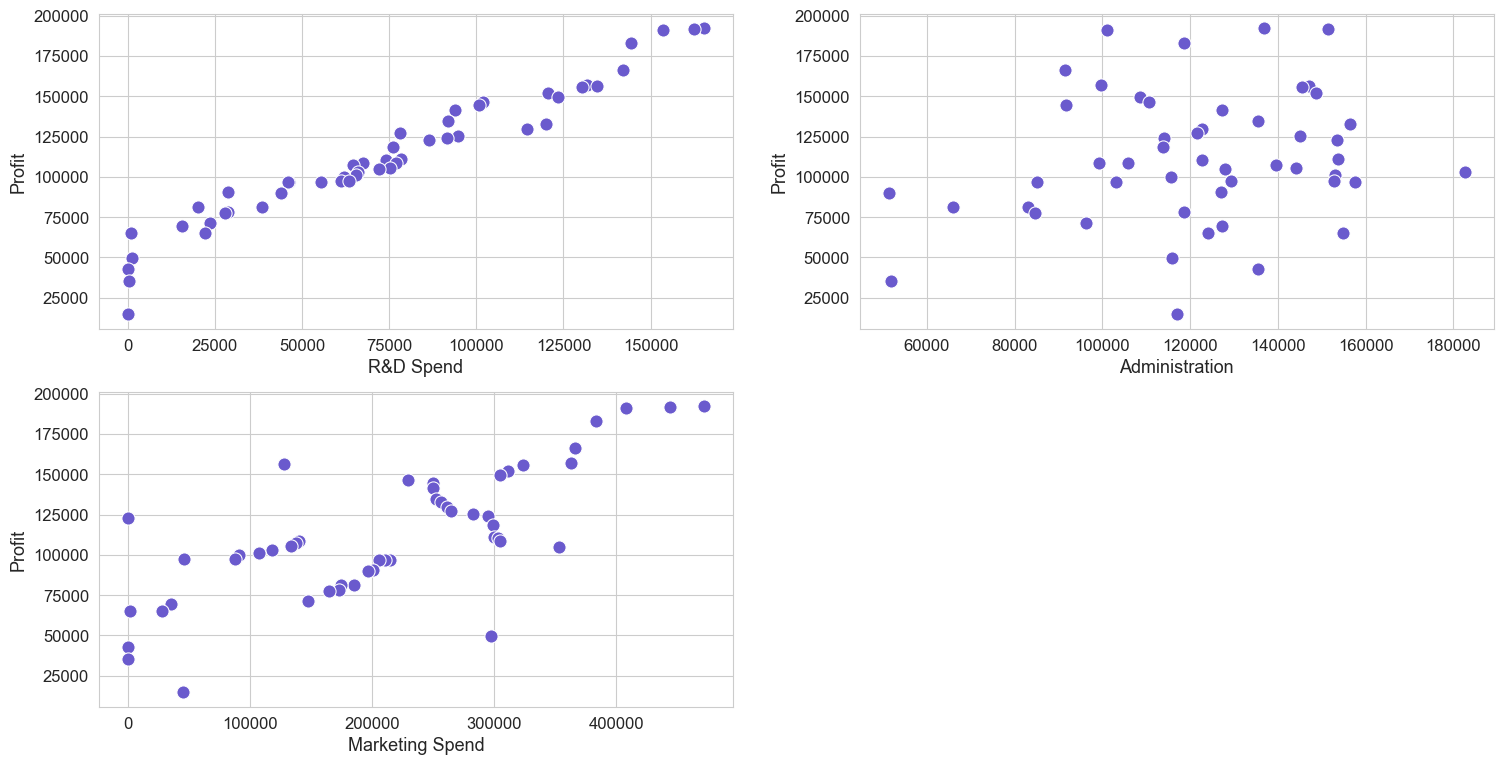

In [15]:
# Scatter plot for checking relationship
r=2
c=2
p=1
l1=['R&D Spend', 'Administration', 'Marketing Spend']
plt.figure(figsize=(18,9))
for i in l1:
    plt.subplot(r,c,p)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(i, fontsize=13)
    plt.ylabel("Profit", fontsize=13)
    sns.scatterplot(x=df[i],y=df["Profit"],color="slateblue",s=90)
    p=p+1
plt.show()

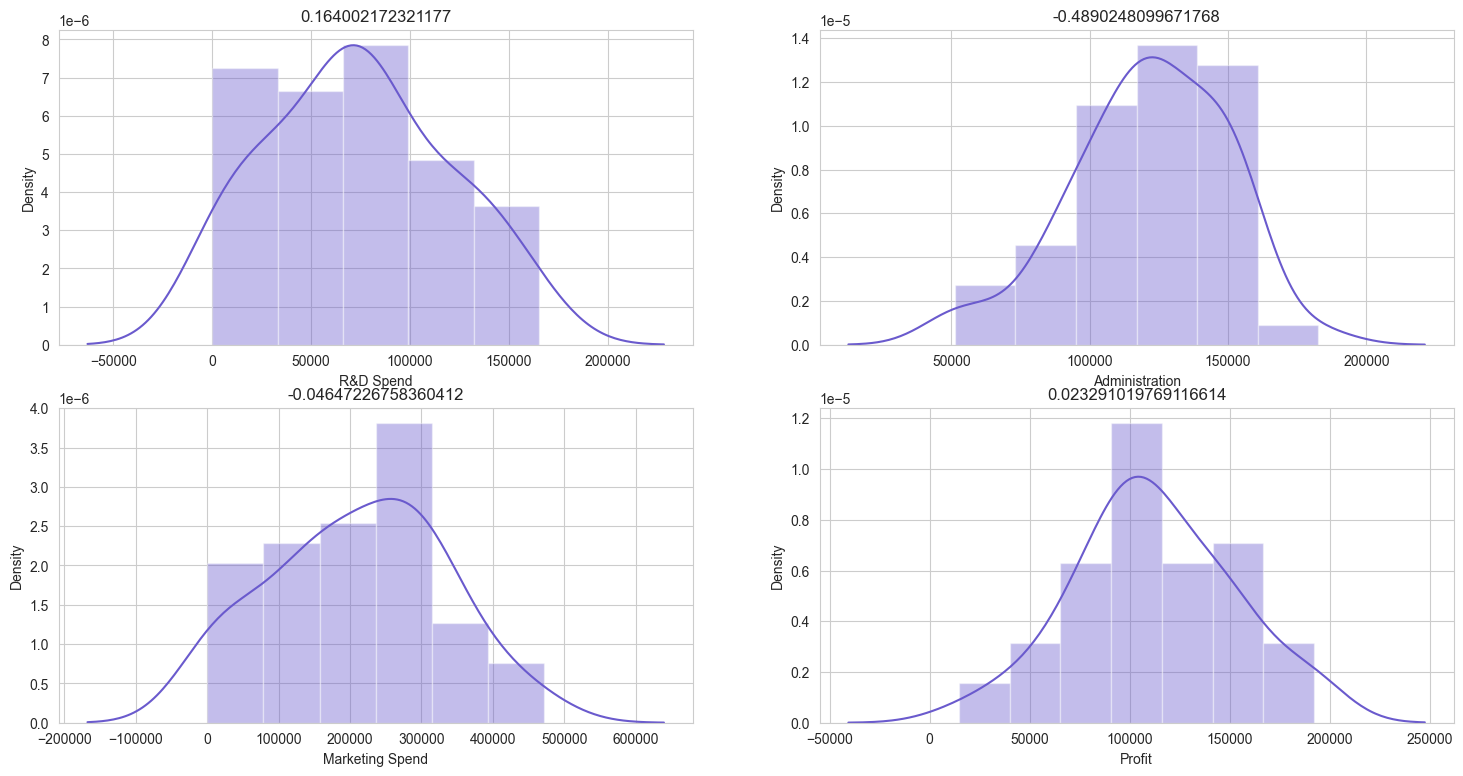

In [16]:
# Distribution Plot with Skewness
l2=['R&D Spend', 'Administration', 'Marketing Spend',"Profit"]
r=2
c=2
p=1
plt.figure(figsize=(18,9))
for i in l2:
    plt.subplot(r,c,p)
    sns.distplot(df[i],color="slateblue")
    plt.title(df[i].skew())
    p=p+1
plt.show()

In [17]:
#creating a simple dataframe to create heatmap
hm_df=df.drop("State",axis=1)

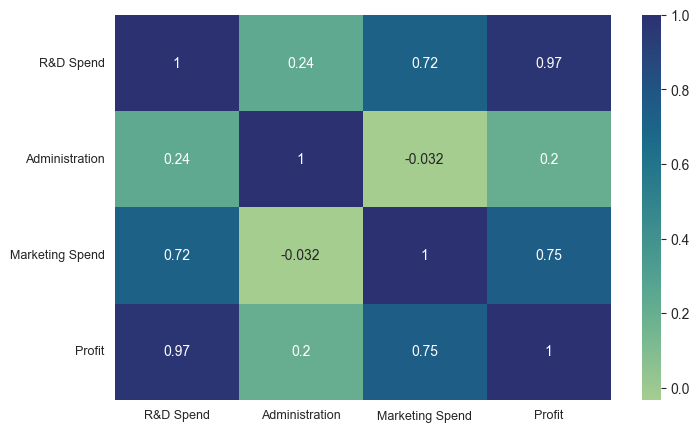

In [18]:
#HeatMap
plt.figure(figsize=(8,5))
sns.heatmap(hm_df.corr(),cmap="crest",annot=True)
plt.xticks(fontsize=9)
plt.yticks(fontsize=9)
plt.show()

In [19]:
hm_df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [20]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


#### Conclusion from task (2)

### <i>I Tried Each Feature Relation With Profit Somewhere Research & Development, And Advertising Spending Has Been Great Contributor To Overall Profit, Than Administration Spending.</i>
- R&D correlation with profit: 0.97 (HIGH)
- Marketing spend correlation with profit: 0.74 (MEDIUM)
- Administration correlation with profit: 0.2 (LOW)
- R&D and Profit have No skewness: means data distribution is good
- Marketing spend & Administration data distribution is slightly towards negative side.

### Task 3: 
- Individually Profit Prediction of each Feature.
- Profit Prediction of all the Feature.
- Linear Regression Algorithm.
- Metrics Score.

In [21]:
# importing algorithm,model & metrics.
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import mean_squared_error,r2_score

### R&D Spending Profit Prediction

In [22]:
x1=df["R&D Spend"]
y1=df["Profit"]

In [23]:
print(x1.size)
print(y1.size)

50
50


In [24]:
x1_train,x1_test,y1_train,y1_test=tts(x1,y1,test_size=0.30,random_state=1)

In [25]:
print(x1_train.size)
print(y1_test.size)

35
15


In [26]:
lr=LinearRegression()

In [27]:
lr.fit(np.array(x1_train).reshape(-1,1),y1_train)

LinearRegression()

#### Training Data Prediction

In [28]:
y1_predtrain=lr.predict(np.array(x1_train).reshape(-1,1))

#### Testing Data Prediction

In [29]:
y1_predtest=lr.predict(np.array(x1_test).reshape(-1,1))

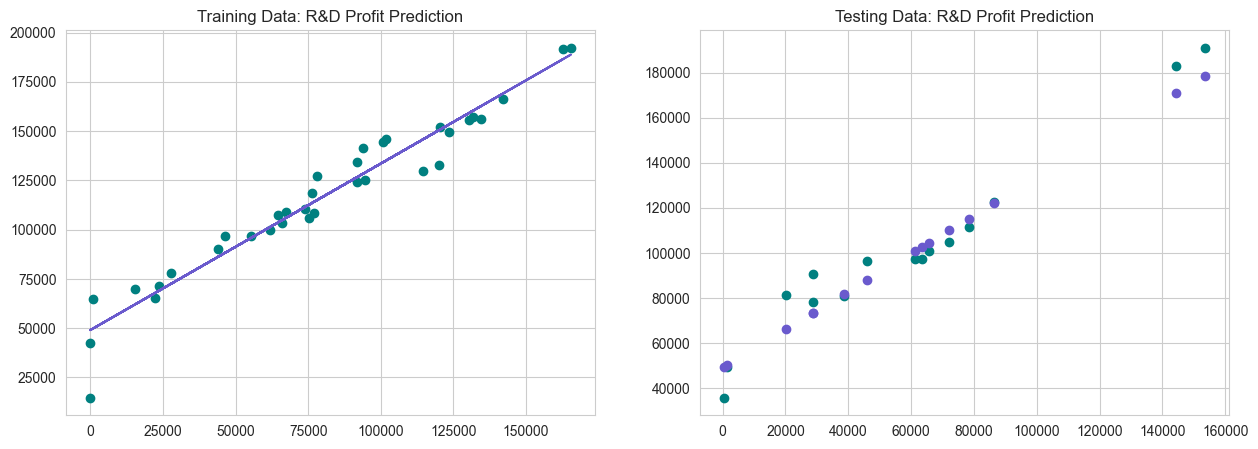

In [30]:
# R&D spend, ploting both training and testing profit prediction 
tr="Training"
te="Testing"
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title(tr+" Data: R&D Profit Prediction")
plt.scatter(x1_train,y1_train,color="teal")
plt.plot(x1_train,y1_predtrain,color="slateblue")

plt.subplot(1,2,2)
plt.title(te+" Data: R&D Profit Prediction")
plt.scatter(x1_test,y1_test,color="teal")
plt.scatter(x1_test,y1_predtest,color="slateblue")
plt.show()

#### Checking Scores of prediction

In [31]:
rd_mse=mean_squared_error(y1_test,y1_predtest)
rd_r2score=r2_score(y1_test,y1_predtest)

In [32]:
print("Mean Squared Error of R&D Spend:",rd_mse)
print("Residual Sum Of Square of R&D Spend:",rd_r2score)

Mean Squared Error of R&D Spend: 80503633.33967794
Residual Sum Of Square of R&D Spend: 0.9492443278341774


## <i>For The Above Analysis R2 Score Is Good at 0.94: So Our Profit Prediction From R&D Spending is Accurate.</i>

### Marketing Spend Profit Prediction

In [33]:
x2=df["Marketing Spend"]
y2=df["Profit"]

In [34]:
x2_train,x2_test,y2_train,y2_test=tts(x2,y2,test_size=0.30,random_state=1)

In [35]:
print(x2_train.size)
print(y2_test.size)

35
15


In [36]:
lr2=LinearRegression()

In [37]:
lr2.fit(np.array(x2_train).reshape(-1,1),y2_train)

LinearRegression()

#### Training & Testing Data Prediction

In [38]:
y2_predtrain=lr2.predict(np.array(x2_train).reshape(-1,1))
y2_predtest=lr2.predict(np.array(x2_test).reshape(-1,1))

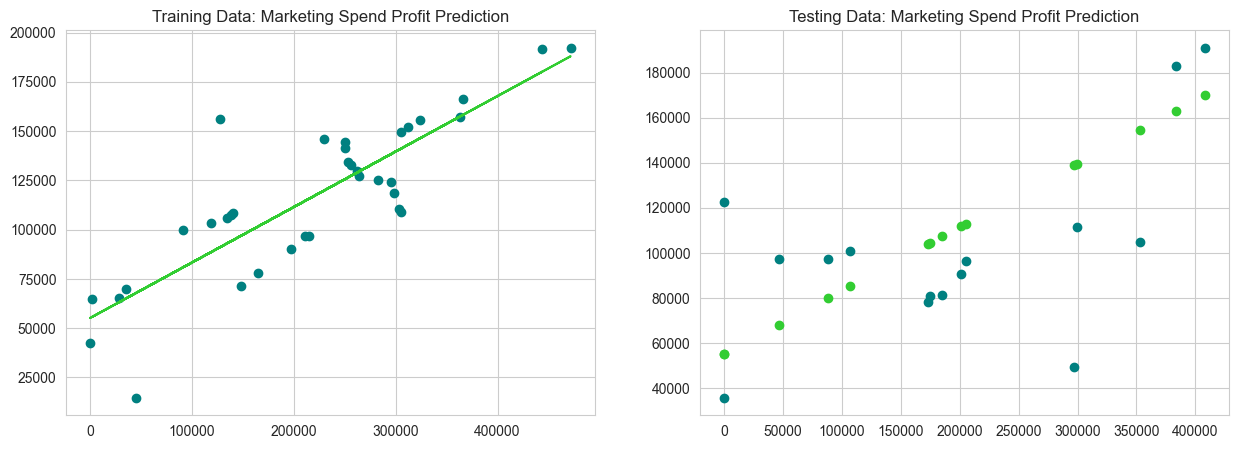

In [39]:
# Marketing spend, ploting both training and testing profit prediction 
tr="Training"
te="Testing"
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title(tr+" Data: Marketing Spend Profit Prediction")
plt.scatter(x2_train,y2_train,color="teal")
plt.plot(x2_train,y2_predtrain,color="limegreen")

plt.subplot(1,2,2)
plt.title(te+" Data: Marketing Spend Profit Prediction")
plt.scatter(x2_test,y2_test,color="teal")
plt.scatter(x2_test,y2_predtest,color="limegreen")
plt.show()

#### Checking Scores of prediction

In [40]:
mp_mse=mean_squared_error(y2_test,y2_predtest)
mp_r2score=r2_score(y2_test,y2_predtest)

In [41]:
print("Mean Squared Error of Marketing Spend:",mp_mse)
print("Residual Sum Of Square of Marketing Spend:",mp_r2score)

Mean Squared Error of Marketing Spend: 1402034575.65933
Residual Sum Of Square of Marketing Spend: 0.1160497441518602


## <i>For The Above Analysis R2 Score Is Very Low at 0.11: That Means Accuracy of Prediction is Worst.</i>

### Administration Spend Profit Prediction

In [42]:
x3=df["Administration"]
y3=df["Profit"]

In [43]:
x3_train,x3_test,y3_train,y3_test=tts(x3,y3,test_size=0.30,random_state=1)

In [44]:
lr3=LinearRegression()

In [45]:
lr3.fit(np.array(x3_train).reshape(-1,1),y3_train)

LinearRegression()

In [46]:
print("Intercept",lr3.intercept_)
print("Slope",lr3.coef_)

Intercept 94564.05797094414
Slope [0.17761353]


In [47]:
y3_predtrain=lr3.predict(np.array(x3_train).reshape(-1,1))
y3_predtest=lr3.predict(np.array(x3_test).reshape(-1,1))

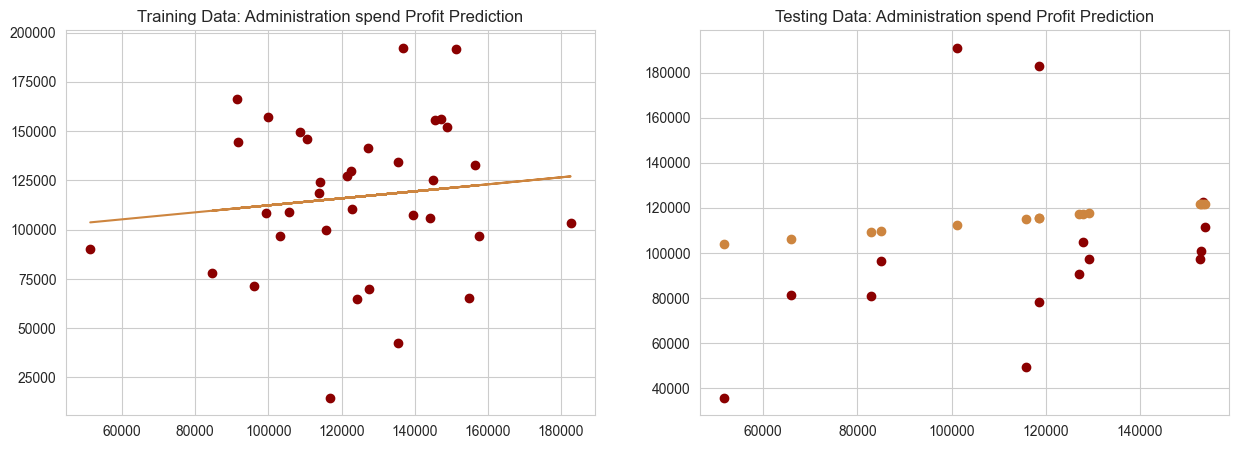

In [48]:
# Administration spend, ploting both training and testing profit prediction 
tr="Training"
te="Testing"
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title(tr+" Data: Administration spend Profit Prediction")
plt.scatter(x3_train,y3_train,color="darkred")
plt.plot(x3_train,y3_predtrain,color="peru")

plt.subplot(1,2,2)
plt.title(te+" Data: Administration spend Profit Prediction")
plt.scatter(x3_test,y3_test,color="darkred")
plt.scatter(x3_test,y3_predtest,color="peru")
plt.show()

#### Checking Scores of prediction

In [49]:
ap_mse=mean_squared_error(y3_test,y3_predtest)
ap_r2score=r2_score(y3_test,y3_predtest)
print("Mean Squared Error of Admin Spend:",ap_mse)
print("Residual Sum Of Square of Admin Spend:",ap_r2score)

Mean Squared Error of Admin Spend: 1667569573.186587
Residual Sum Of Square of Admin Spend: -0.05136390817584591


## <i>For The Above Analysis R2 Score Is Very Low at -0.05: That Means Accuracy of Prediction is Worst.</i>

#### Conclusion from task (3)
### <b><i>I Tried Profit Prediction For Each Features Individually. I Came To The Conclusion That Research And Development Spending Gave Good Accuracy Of 94%.</i></b>

### <b>Label Encoding</b>

State Column Have Categorial Values. In This Case I Need To Convert It's Values Into Numberic.
### Task 4:
- Using Label Encoding
- Multi Linear Regression Prediction.

In [50]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [51]:
# importing label encoder
from sklearn.preprocessing import LabelEncoder

In [52]:
le=LabelEncoder()

In [53]:
# checking how changes will look after encoding a column's value
le.fit_transform(df["State"]) 

array([2, 0, 1, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 0, 1, 2, 0, 2, 1, 2, 0, 2,
       1, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 2,
       0, 2, 1, 0, 2, 0])

In [54]:
df["State"]=le.fit_transform(df["State"])

In [55]:
df

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94
5,131876.90,99814.71,362861.36,2,156991.12
6,134615.46,147198.87,127716.82,0,156122.51
7,130298.13,145530.06,323876.68,1,155752.60
8,120542.52,148718.95,311613.29,2,152211.77
9,123334.88,108679.17,304981.62,0,149759.96


In [69]:
print(df.groupby("State")[cols].sum())

        R&D Spend  Administration  Marketing Spend      Profit
State                                                         
0      1099180.46      2052690.62       3103195.80  1766387.98
1      1291584.26      1948302.36       3957176.82  1900384.39
2      1295316.06      2066239.00       3490882.27  1933859.59


### <b>MULTI LINEAR REGRESSION</b>

In [56]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [57]:
# creating feature and targets
x4=df.drop("Profit",axis=1)
y4=df['Profit']

In [58]:
x4

,R&D Spend,Administration,Marketing Spend,State
0,165349.20,136897.80,471784.10,2
1,162597.70,151377.59,443898.53,0
2,153441.51,101145.55,407934.54,1
3,144372.41,118671.85,383199.62,2
4,142107.34,91391.77,366168.42,1
5,131876.90,99814.71,362861.36,2
6,134615.46,147198.87,127716.82,0
7,130298.13,145530.06,323876.68,1
8,120542.52,148718.95,311613.29,2
9,123334.88,108679.17,304981.62,0


In [59]:
x4_train,x4_test,y4_train,y4_test=tts(x4,y4,test_size=0.30,random_state=1)

In [74]:
y4_test.shape

(15,)

In [70]:
x4_train.shape

(35, 4)

In [71]:
x4_test.shape

(15, 4)

In [62]:
lr4=LinearRegression()

In [63]:
# Running algorith
lr4.fit(x4_train,y4_train)

LinearRegression()

In [64]:
y4_predtrain=lr4.predict(x4_train)
y4_predtest=lr4.predict(x4_test)

In [65]:
y4_predtest

array([114878.01106269,  90238.80827656,  75788.36157128,  69925.44816199,
       180100.61653103, 171768.08478455,  48515.57364274, 100967.64611307,
        58752.92356965,  96869.73813499,  97958.4060594 ,  83927.1832468 ,
       117499.71697616,  76348.14950108, 113290.01034301])

In [66]:
lr4.coef_

array([ 7.71026662e-01, -1.41447139e-02,  3.47133854e-02, -2.33476536e+02])

In [81]:
lr4.intercept_

49296.483766512174

In [76]:
df_mse=mean_squared_error(y4_test,y4_predtest)
df_r2score=r2_score(y4_test,y4_predtest)
print("MSE:",df_mse)
print("Residual Sum Of Square:",df_r2score)

MSE: 73892677.13066143
Residual Sum Of Square: 0.9534123822700766


In [77]:
# creating a dataframe for checking prediction value difference
pred_diff=pd.DataFrame({"Actual Value":y4_test, "Predicted Value":y4_predtest,"Difference":y4_test-y4_predtest})

In [78]:
pred_diff

,Actual Value,Predicted Value,Difference
27,105008.31,114878.011063,-9869.701063
35,96479.51,90238.808277,6240.701723
40,78239.91,75788.361571,2451.548429
38,81229.06,69925.448162,11303.611838
2,191050.39,180100.616531,10949.773469
3,182901.99,171768.084785,11133.905215
48,35673.41,48515.573643,-12842.163643
29,101004.64,100967.646113,36.993887
46,49490.75,58752.923570,-9262.173570
31,97483.56,96869.738135,613.821865


#### Conclusion from task (4)
<h3><b><i>Prediction for the above features and target is good with accuracy of 95%.</i></b></h3>